In [1]:
#First, we want to get all of our data instances and classes to use. I will use PIL library to load the images because I have used it before and it is simple.
import numpy as np
from PIL import Image
import os

#local filepath to the dataset (just a folder with a bunch of images)
dataset_filepath = "Dataset"

#Create container for dataset features (pixels) and dataset labels (rock type)
dataset_features = []
dataset_labels = []


#iteratee through each image and add each image isntance into an array (and convert the result to a numpy array) for features
#Also get the Rocktype and add it to the labels container
for image_name in os.listdir(dataset_filepath):
    image_filepath = os.path.join(dataset_filepath, image_name)

    #label (rocktype) and features (pixels). the First charachter is the image class
    image_features = np.array(Image.open(image_filepath).convert('RGB'))
    image_label = image_name[0].upper()

    #add to respective container
    dataset_features.append(image_features)
    dataset_labels.append(image_label)


#now convert each container to numpy arrays (this will help later on when we are doiong a lot data manipulation and calculations)
dataset_features = np.array(dataset_features)
dataset_labels = np.array(dataset_labels)

In [2]:
#Now I want to do a little bit of visualization just so we understand the dataset we are working at

#First I want to see if all the images are the same size. If they are not, I am goiong to resize them all. Image check will be zero if all imagea re the same size
image_size = dataset_features[0].shape
image_check = sum([(image.shape != image_size) for image in dataset_features])

#print results
print(f"All Images Have Same Size: {image_check == 0}")

print(f"\nTotal Dataset Instances: {len(dataset_labels)}")
print(f"Individual Image Shape: {image_size}")

#Yay! They are all the same shape :)

All Images Have Same Size: True

Total Dataset Instances: 360
Individual Image Shape: (800, 800, 3)


Total Classes: 3


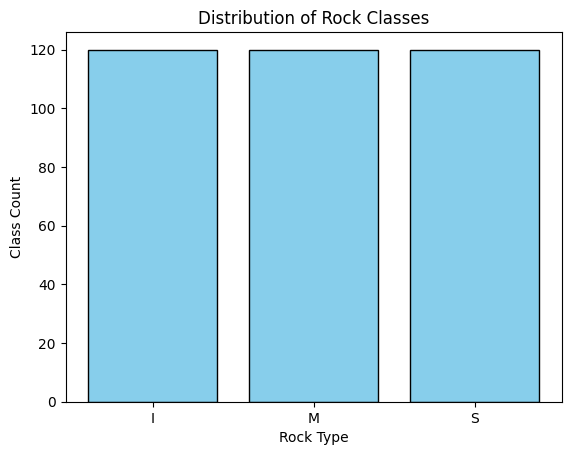

In [3]:
#And now also just a little information about our labels

#First I want to see how many labels we have (should be 3 classes), and I also want to see how amyn isntances we have of each class and plot its histogram. 
#This could be usefew for if we accidentally train or test on disporportionate class instances and just to generally know
# Create a histogram of the labels
import matplotlib.pyplot as plt

classes, classes_counts = np.unique(dataset_labels, return_counts=True)

#Plot the histogram
plt.bar(classes, classes_counts, color='skyblue', edgecolor='black')

plt.xlabel('Rock Type')
plt.ylabel('Class Count')
plt.title('Distribution of Rock Classes')


print(f"Total Classes: {len(classes)}")